# Demo: Binary Classification Engine

This notebook demonstrates how to use the binary classification engine from the core library of Artifact-ML to evaluate a binary classification experiment.

We'll walk through:

1. Loading the classification results
2. Setting up the validation engine
3. Computing various validation artifacts

## Setup

First, we'll set up our environment and import the necessary libraries.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from artifact_core.binary_classification import (
    BinaryClassificationArrayCollectionType,
    BinaryClassificationArrayType,
    BinaryClassificationEngine,
    BinaryClassificationPlotCollectionType,
    BinaryClassificationPlotType,
    BinaryClassificationScoreCollectionType,
    BinaryClassificationScoreType,
    BinaryFeatureSpec,
)
from scipy.special import logit as logt_fn

## Loading the Data

We'll load the classification results from a file.

In [3]:
artifact_core_root = Path().absolute().parent.parent

df_classification_results = pd.read_csv(artifact_core_root / "assets/binary_classification.csv")

Let's examine the classification results to understand their structure and content:

In [4]:
df_classification_results

,weight,height,age,bmi,arthritis_true,arthritis_prob_est,arthritis_pred
0,73.1,168.7,41,25.7,1,0.525,1
1,116.3,166.6,21,41.9,1,0.596,1
2,99.9,158.8,23,39.6,1,0.579,1
3,89.9,180.4,64,27.6,1,0.689,1
4,56.7,173.8,32,18.8,0,0.324,0
...,...,...,...,...,...,...,...
9995,109.3,193.9,31,29.1,1,0.576,1
9996,112.3,152.3,64,48.4,1,0.847,1
9997,116.0,165.2,33,42.5,1,0.657,1
9998,74.8,172.2,76,25.2,0,0.627,1


Let's parse the results to extract quantities required for evaluation:

In [5]:
true = df_classification_results["arthritis_true"].to_dict()
predicted = df_classification_results["arthritis_pred"].to_dict()
probs_pos = df_classification_results["arthritis_prob_est"].to_dict()
logits = df_classification_results["arthritis_prob_est"].apply(logt_fn).to_dict()

## Resource Specification Setup

Before we can evaluate the results, we need to specify labelling metadata.

This information helps the binary classification comparison engine interpret the classification results appropriately.

In [6]:
class_spec = BinaryFeatureSpec(
    ls_categories=["0", "1"], positive_category="1", feature_name="arthritis_true"
)

class_spec

BinaryFeatureSpec(feature_name='arthritis_true', categories=['0', '1'], positive_category='1', negative_category='0')

## Initializing the Validation Engine

Now we'll initialize the BinaryClassificationEngine with our resource specification.

This engine will handle all tasks related to classification result evaluation.

In [7]:
engine = BinaryClassificationEngine(resource_spec=class_spec)

## Computing Validation Artifacts

Let’s use the engine to explore a range of validation artifacts that capture the quality of the classification results.

In [8]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.ACCURACY,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.654

In [9]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.PRECISION,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.6765285996055227

In [10]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.RECALL,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.7339514978601998

In [11]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.FNR,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.2660485021398003

In [12]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.FPR,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.44808743169398907

In [13]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.TNR,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.5519125683060109

In [14]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.MCC,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.29065566424148515

In [15]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.GROUND_TRUTH_PROB_MEAN,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.5714521

In [16]:
engine.produce_classification_score_collection(
    score_collection_type=BinaryClassificationScoreCollectionType.GROUND_TRUTH_PROB_STATS,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'mean': 0.5714521,
 'std': 0.17483328508424056,
 'variance': 0.030566677573347335,
 'median': 0.577,
 'q1': 0.44799999999999995,
 'q3': 0.703,
 'min': 1.1102230246251534e-15,
 'max': 0.9999999999999989}

In [17]:
engine.produce_classification_score_collection(
    score_collection_type=BinaryClassificationScoreCollectionType.BINARY_PREDICTION_SCORES,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'accuracy': 0.654,
 'balanced_accuracy': 0.6429320330831053,
 'precision': 0.6765285996055227,
 'npv': 0.6189989785495403,
 'recall': 0.7339514978601998,
 'tnr': 0.5519125683060109,
 'fp': 0.44808743169398907,
 'fnr': 0.2660485021398003,
 'f1': 0.7040711597673623,
 'mcc': 0.29065566424148515}

In [18]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.ROC_AUC,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.6429320330831053

In [19]:
engine.produce_classification_score(
    score_type=BinaryClassificationScoreType.PR_AUC,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

0.6457391790257367

In [20]:
engine.produce_classification_score_collection(
    score_collection_type=BinaryClassificationScoreCollectionType.THRESHOLD_VARIATION_SCORES,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'ROC_AUC': 0.7085203384963973, 'PR_AUC': 0.7473341526440216}

In [21]:
engine.produce_classification_score_collection(
    score_collection_type=BinaryClassificationScoreCollectionType.NORMALIZED_CONFUSION_COUNTS,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'true_positive': 4116,
 'false_positive': 1968,
 'true_negative': 2424,
 'false_negative': 1492}

In [22]:
engine.produce_classification_score_collection(
    score_collection_type=BinaryClassificationScoreCollectionType.SCORE_MEANS,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'ALL': 0.5531285,
 'POSITIVE': 0.6110740014265336,
 'NEGATIVE': 0.4791397996357013}

In [23]:
engine.produce_classification_score_collection(
    score_collection_type=BinaryClassificationScoreCollectionType.POSITIVE_CLASS_SCORE_STATS,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'MEAN': 0.6110740014265336,
 'STD': 0.16944934700428851,
 'VARIANCE': 0.028713081200179777,
 'MEDIAN': 0.62,
 'Q1': 0.49,
 'Q3': 0.743,
 'MIN': 0.10900000000000001,
 'MAX': 0.9999999999999989}

In [24]:
engine.produce_classification_array(
    array_type=BinaryClassificationArrayType.CONFUSION_MATRIX,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

array([[4116., 1492.],
       [1968., 2424.]])

In [25]:
engine.produce_classification_array_collection(
    array_collection_type=BinaryClassificationArrayCollectionType.CONFUSION_MATRICES,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'NONE': array([[4116., 1492.],
        [1968., 2424.]]),
 'TRUE': array([[0.7339515 , 0.2660485 ],
        [0.44808743, 0.55191257]]),
 'PRED': array([[0.6765286 , 0.38100102],
        [0.3234714 , 0.61899898]]),
 'ALL': array([[0.4116, 0.1492],
        [0.1968, 0.2424]])}

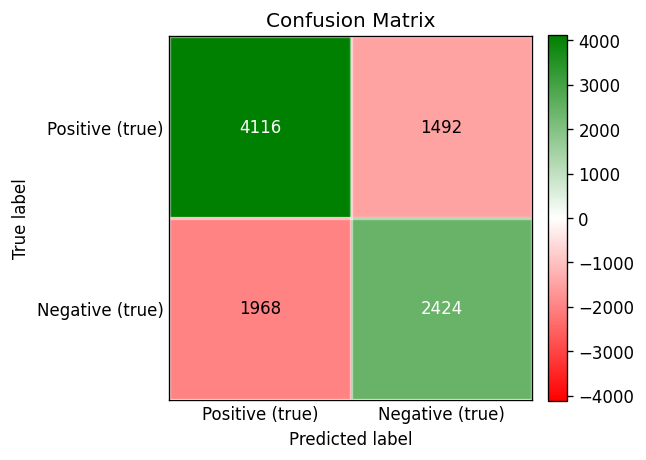

In [26]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.CONFUSION_MATRIX_PLOT,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

{'NONE': <Figure size 600x480 with 2 Axes>, 'TRUE': <Figure size 600x480 with 2 Axes>, 'PRED': <Figure size 600x480 with 2 Axes>, 'ALL': <Figure size 600x480 with 2 Axes>}


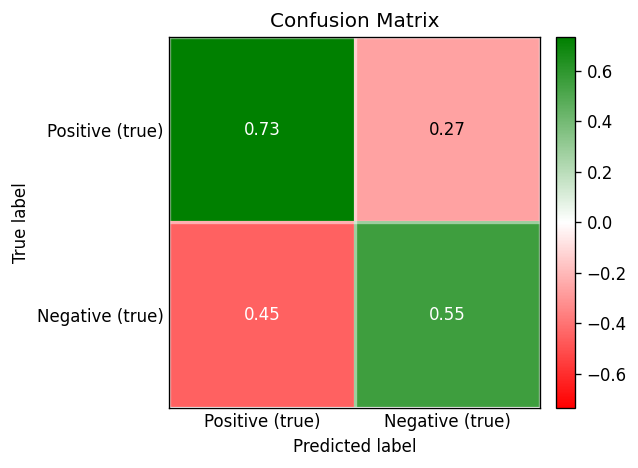

In [27]:
dict_plots = engine.produce_classification_plot_collection(
    plot_collection_type=BinaryClassificationPlotCollectionType.CONFUSION_MATRIX_PLOTS,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

print(dict_plots)

dict_plots["TRUE"]

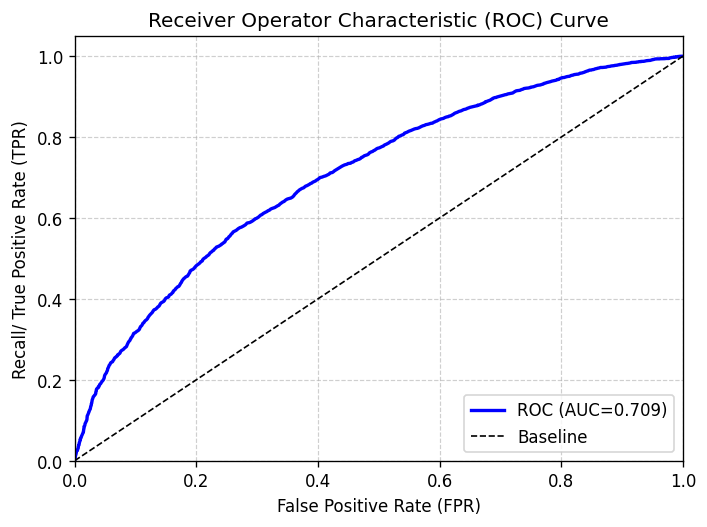

In [28]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.ROC_CURVE,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

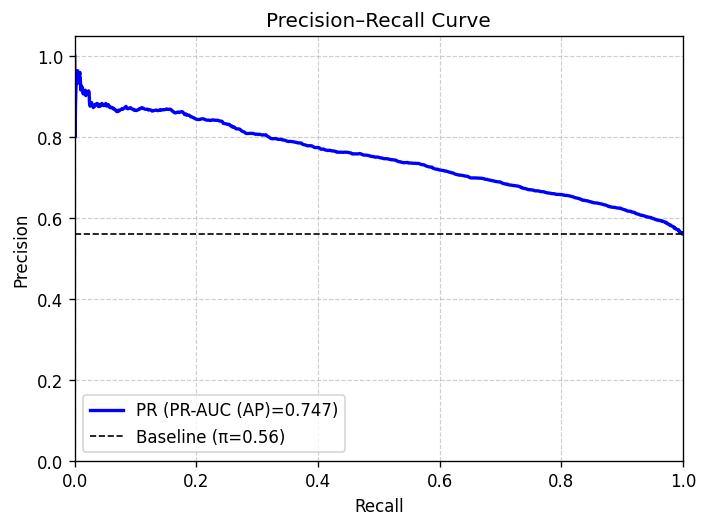

In [29]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.PR_CURVE,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

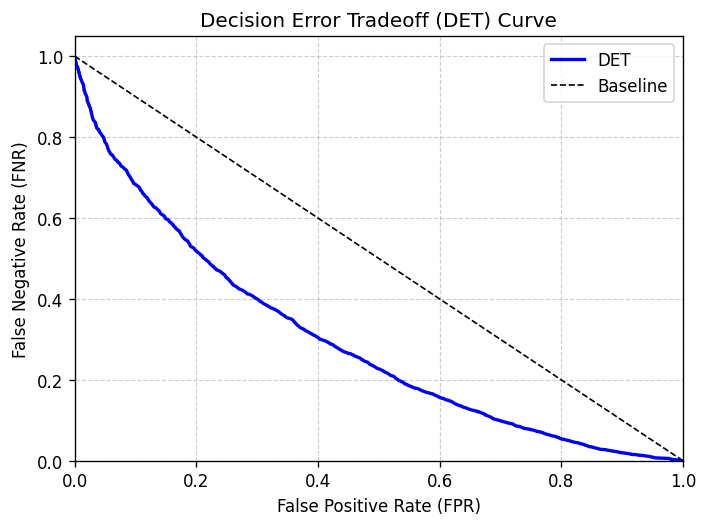

In [30]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.DET_CURVE,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

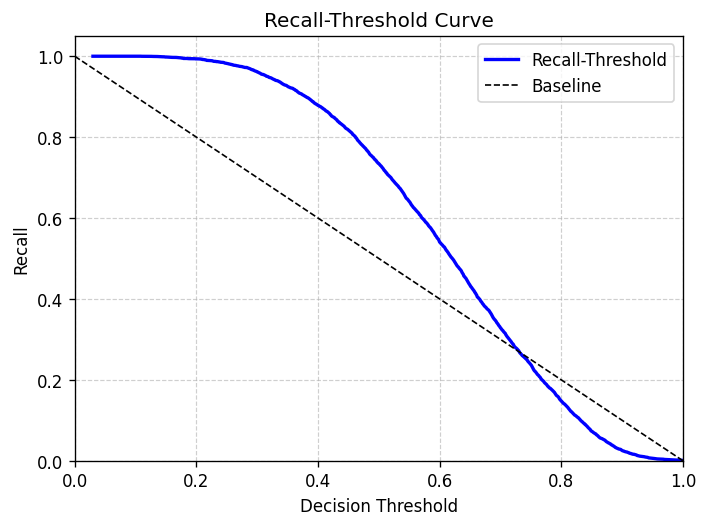

In [31]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.RECALL_THRESHOLD_CURVE,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

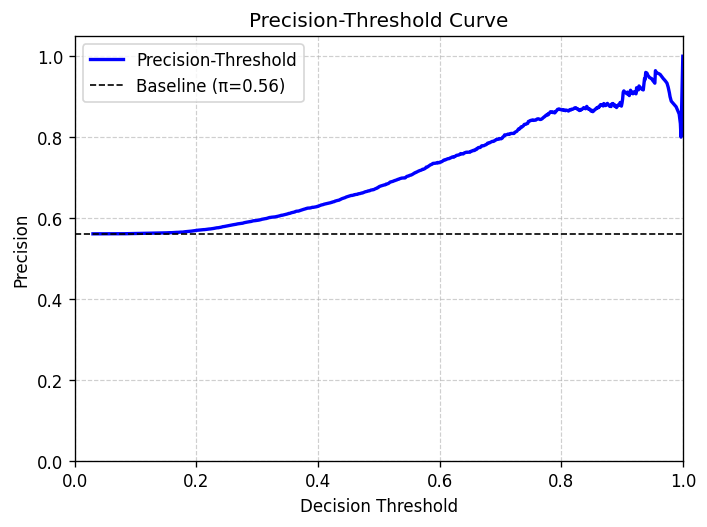

In [32]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.PRECISION_THRESHOLD_CURVE,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

In [33]:
dict_plots = engine.produce_classification_plot_collection(
    plot_collection_type=BinaryClassificationPlotCollectionType.THRESHOLD_VARIATION_CURVES,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

print(dict_plots)

{'roc': <Figure size 720x540 with 1 Axes>, 'pr': <Figure size 720x540 with 1 Axes>, 'det': <Figure size 720x540 with 1 Axes>, 'recall_threshold': <Figure size 720x540 with 1 Axes>, 'precision_threshold': <Figure size 720x540 with 1 Axes>}


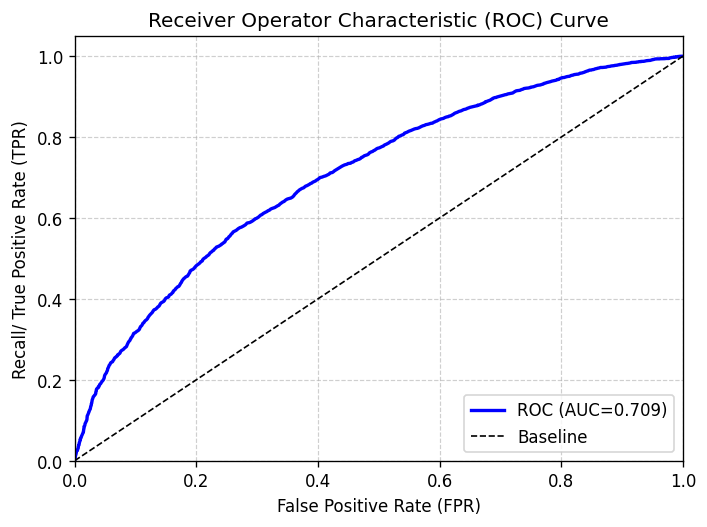

In [34]:
dict_plots["roc"]

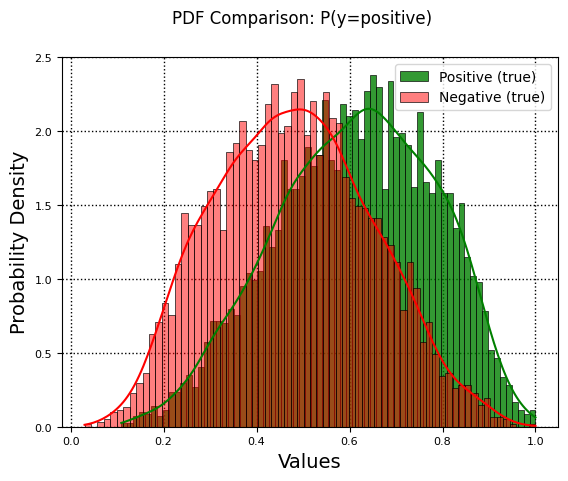

In [35]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.SCORE_PDF,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

In [36]:
dict_plots = engine.produce_classification_plot_collection(
    plot_collection_type=BinaryClassificationPlotCollectionType.SCORE_PDF_PLOTS,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)

print(dict_plots)

{'ALL': <Figure size 640x480 with 1 Axes>, 'POSITIVE': <Figure size 640x480 with 1 Axes>, 'NEGATIVE': <Figure size 640x480 with 1 Axes>}


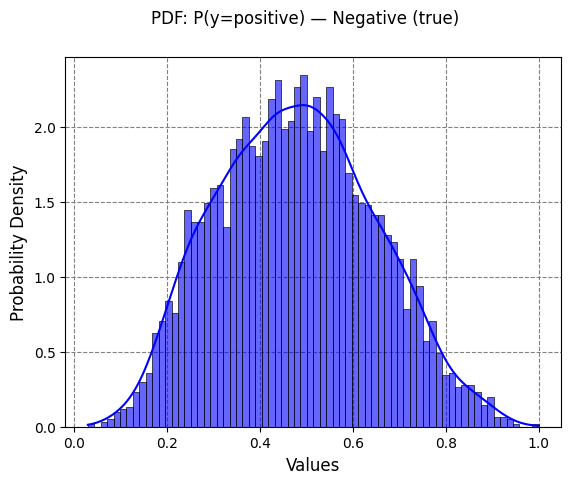

In [37]:
dict_plots["NEGATIVE"]

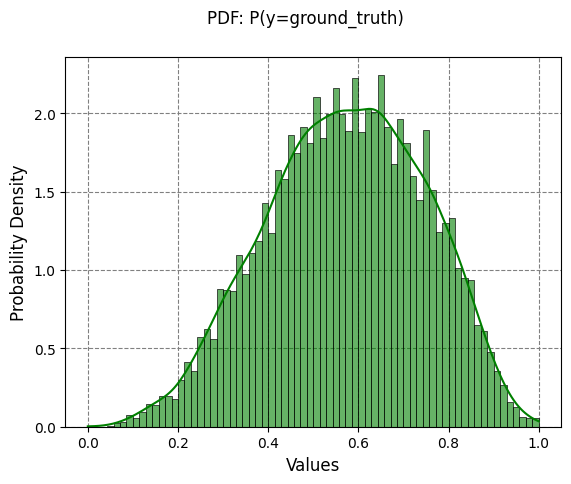

In [38]:
engine.produce_classification_plot(
    plot_type=BinaryClassificationPlotType.GROUND_TRUTH_PROB_PDF,
    true=true,
    predicted=predicted,
    probs_pos=probs_pos,
)